In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = 'data/pred_merged/'

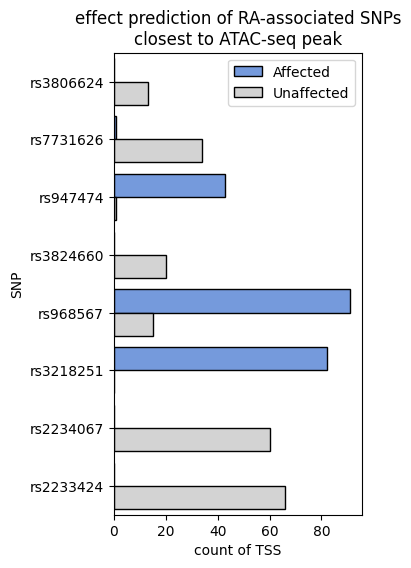

In [3]:
# small model
data = pd.read_csv('data/pred_merged/merged_all.csv')

ax = plt.subplots(figsize=(3.2,6))

morandi_palette = ['#6495ED','#D3D3D3']
ax = sns.barplot(y = 'SNP', x = 'count of TSS', data = data, hue = 'type', ci=50, palette=morandi_palette, alpha=1)
#plt.xlim(0, 50)

for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1)

#plt.xlim(0, 36)
plt.legend(loc="best")
plt.title('effect prediction of RA-associated SNPs\nclosest to ATAC-seq peak')
plt.savefig('images/distribution.png',dpi=300, bbox_inches = 'tight')
plt.show()